In [1]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
import getdist
from scipy import integrate

In [2]:
MC_chainWithDESI_fQT=np.loadtxt("MC_chainWithDESI_fQT.txt", delimiter=',')
MC_chainNoDESI_fQT=np.loadtxt("MC_chainNoDESI_fQT.txt", delimiter=',')
MC_chainWithDESI_fQ=np.loadtxt("MC_chainWithDESI_fQ.txt", delimiter=',')
MC_chainWithDESI_fQT_meq1=np.loadtxt("MC_chainWithDESI_fQT_m=1.txt", delimiter=',')
MC_chainWithDESI_LCDM=np.loadtxt("MC_chain_LCDM.txt", delimiter=',')
MC_chainWithDESI_fQT_Deq0=np.loadtxt("MC_chainWithDESI_fQT_D=0.txt", delimiter=',')
MC_chainWithDESI_fQT_Deq05=np.loadtxt("MC_chainWithDESI_fQT_D=05.txt", delimiter=',')

In [3]:
# 数据读取
file_name1 = "BAOData.txt"
dataB=np.loadtxt(file_name1, skiprows=1, usecols = (1,2,3), dtype=np.float32)
file_name2 = "SNIaData.txt"
dataS=np.loadtxt(file_name2, skiprows=0, usecols = (4,6,7), dtype=np.float32)
file_name3 = "ChronometersData.txt"
dataH=np.loadtxt(file_name3, skiprows=0, usecols = (0,1,2), dtype=np.float32)

In [4]:
# 将数据放入变量
xS=dataS[:,0]
xB=dataB[:,0]
xH=dataH[:,0]
yS=dataS[:,1]
yB=dataB[:,1]
yH=dataH[:,1]
yerrS=dataS[:,2]
yerrB=dataB[:,2]
yerrH=dataH[:,2]

# DESI数据
z_DV = np.array([0.30, 1.49])  # D_V的红移
z_DM = np.array([0.51, 0.71, 0.93, 1.32, 1.49, 2.33])  # D_M的红移
z_DH = np.array([0.51, 0.71, 0.93, 1.32, 2.33])  # D_H的红移

# 观测值
D_V_obs = np.array([7.93, 26.07])  # D_V
D_M_obs = np.array([13.62, 16.85, 21.71, 27.79, 26.07, 39.71])  # D_M
D_H_obs = np.array([20.98, 20.08, 17.88, 13.82, 8.52])  # D_H

# 误差（标准差）
sigma_DV = np.array([0.15, 0.67])  # D_V的误差
sigma_DM = np.array([0.25, 0.32, 0.28, 0.69, 0.67, 0.94])  # D_M的误差
sigma_DH = np.array([0.61, 0.60, 0.35, 0.42, 0.17])  # D_H的误差

# SDSS 数据
# D_V 数据
z_DV_SDSS = np.array([0.106, 0.15])  # D_V的红移
D_V_obs_SDSS = np.array([2.98, 4.51])  # D_V的观测值
sigma_DV_SDSS = np.array([0.13, 0.14])  # D_V的误差

# D_M 数据
z_DM_SDSS = np.array([0.38, 0.51, 0.70, 0.85, 1.48, 2.33, 2.33])  # D_M的红移
D_M_obs_SDSS = np.array([10.27, 13.38, 17.65, 19.50, 30.21, 37.60, 37.30])  # D_M的观测值
sigma_DM_SDSS = np.array([0.15, 0.18, 0.30, 1.00, 0.79, 1.90, 1.70])  # D_M的误差

# D_H 数据
z_DH_SDSS = np.array([0.38, 0.51, 0.70, 0.85, 1.48, 2.33, 2.33])  # D_H的红移
D_H_obs_SDSS = np.array([24.89, 22.43, 19.78, 19.60, 13.23, 8.93, 9.08])  # D_H的观测值
sigma_DH_SDSS = np.array([0.58, 0.48, 0.46, 2.10, 0.47, 0.28, 0.34])  # D_H的误差

In [5]:
# 获取链的维度：行数（采样点数）和列数（参数个数）
def get_chain_dimensions(chain):
    n_samples, n_params = chain.shape  # 这里得到的是行和列的数量
    return n_samples, n_params

# 获取每个参数的平均值
def get_parameter_means(chain):
    mean_values = np.mean(chain, axis=0)  # 沿着每列计算平均值
    return mean_values


# 提取维度和平均值
dimensions_fQT = get_chain_dimensions(MC_chainWithDESI_fQT)
dimensions_NoDESI_fQT = get_chain_dimensions(MC_chainNoDESI_fQT)
dimensions_fQ = get_chain_dimensions(MC_chainWithDESI_fQ)
dimensions_fQT_meq1 = get_chain_dimensions(MC_chainWithDESI_fQT_meq1)
dimensions_LCDM = get_chain_dimensions(MC_chainWithDESI_LCDM)
dimensions_fQT_Deq0 = get_chain_dimensions(MC_chainWithDESI_fQT_Deq0)
dimensions_fQT_Deq05 = get_chain_dimensions(MC_chainWithDESI_fQT_Deq05)

mean_fQT = get_parameter_means(MC_chainWithDESI_fQT)
mean_NoDESI_fQT = get_parameter_means(MC_chainNoDESI_fQT)
mean_fQ = get_parameter_means(MC_chainWithDESI_fQ)
mean_fQT_meq1 = get_parameter_means(MC_chainWithDESI_fQT_meq1)
mean_LCDM = get_parameter_means(MC_chainWithDESI_LCDM)
mean_fQT_Deq0 = get_parameter_means(MC_chainWithDESI_fQT_Deq0)
mean_fQT_Deq05 = get_parameter_means(MC_chainWithDESI_fQT_Deq05)

# 打印链的维度信息和每个参数的平均值
print("Dimensions of MC_chainWithDESI_fQT:", dimensions_fQT)
print("Mean values of MC_chainWithDESI_fQT:", mean_fQT)

print("\nDimensions of MC_chainNoDESI_fQT:", dimensions_NoDESI_fQT)
print("Mean values of MC_chainNoDESI_fQT:", mean_NoDESI_fQT)

print("\nDimensions of MC_chainWithDESI_fQ:", dimensions_fQ)
print("Mean values of MC_chainWithDESI_fQ:", mean_fQ)

print("\nDimensions of MC_chainWithDESI_fQT_m=1:", dimensions_fQT_meq1)
print("Mean values of MC_chainWithDESI_fQT_m=1:", mean_fQT_meq1)

print("\nDimensions of MC_chainWithDESI_LCDM:", dimensions_LCDM)
print("Mean values of MC_chainWithDESI_LCDM:", mean_LCDM)

print("\nDimensions of MC_chainWithDESI_fQT_Deq0:", dimensions_fQT_Deq0)
print("Mean values of MC_chainWithDESI_fQT_Deq0:", mean_fQT_Deq0)

print("\nDimensions of MC_chainWithDESI_fQT_Deq05:", dimensions_fQT_Deq05)
print("Mean values of MC_chainWithDESI_fQT_Deq05:", mean_fQT_Deq05)

Dimensions of MC_chainWithDESI_fQT: (980, 7)
Mean values of MC_chainWithDESI_fQT: [ 67.68397792  -8.81630408  -0.18020313  -1.13159152  -0.7896146
 -19.39653944 145.2251115 ]

Dimensions of MC_chainNoDESI_fQT: (980, 7)
Mean values of MC_chainNoDESI_fQT: [ 6.77004787e+01 -8.67829800e+00 -1.37898918e-01 -8.98096445e-01
 -9.24797547e-01 -1.93948849e+01  1.43971128e+02]

Dimensions of MC_chainWithDESI_fQ: (490, 6)
Mean values of MC_chainWithDESI_fQ: [ 66.27207387  -8.57616614  -0.74646626  -0.69397899 -19.42797835
 146.29052377]

Dimensions of MC_chainWithDESI_fQT_m=1: (980, 6)
Mean values of MC_chainWithDESI_fQT_m=1: [ 67.44436834  -9.14162009  -0.18305036  -0.83654975 -19.40463998
 145.77509194]

Dimensions of MC_chainWithDESI_LCDM: (2240, 4)
Mean values of MC_chainWithDESI_LCDM: [ 68.74137014   0.32601134 -19.38458577 145.35433029]

Dimensions of MC_chainWithDESI_fQT_Deq0: (1120, 7)
Mean values of MC_chainWithDESI_fQT_Deq0: [ 62.85180436  -5.93498527  -1.01239127  -0.90847785  -0.741376

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


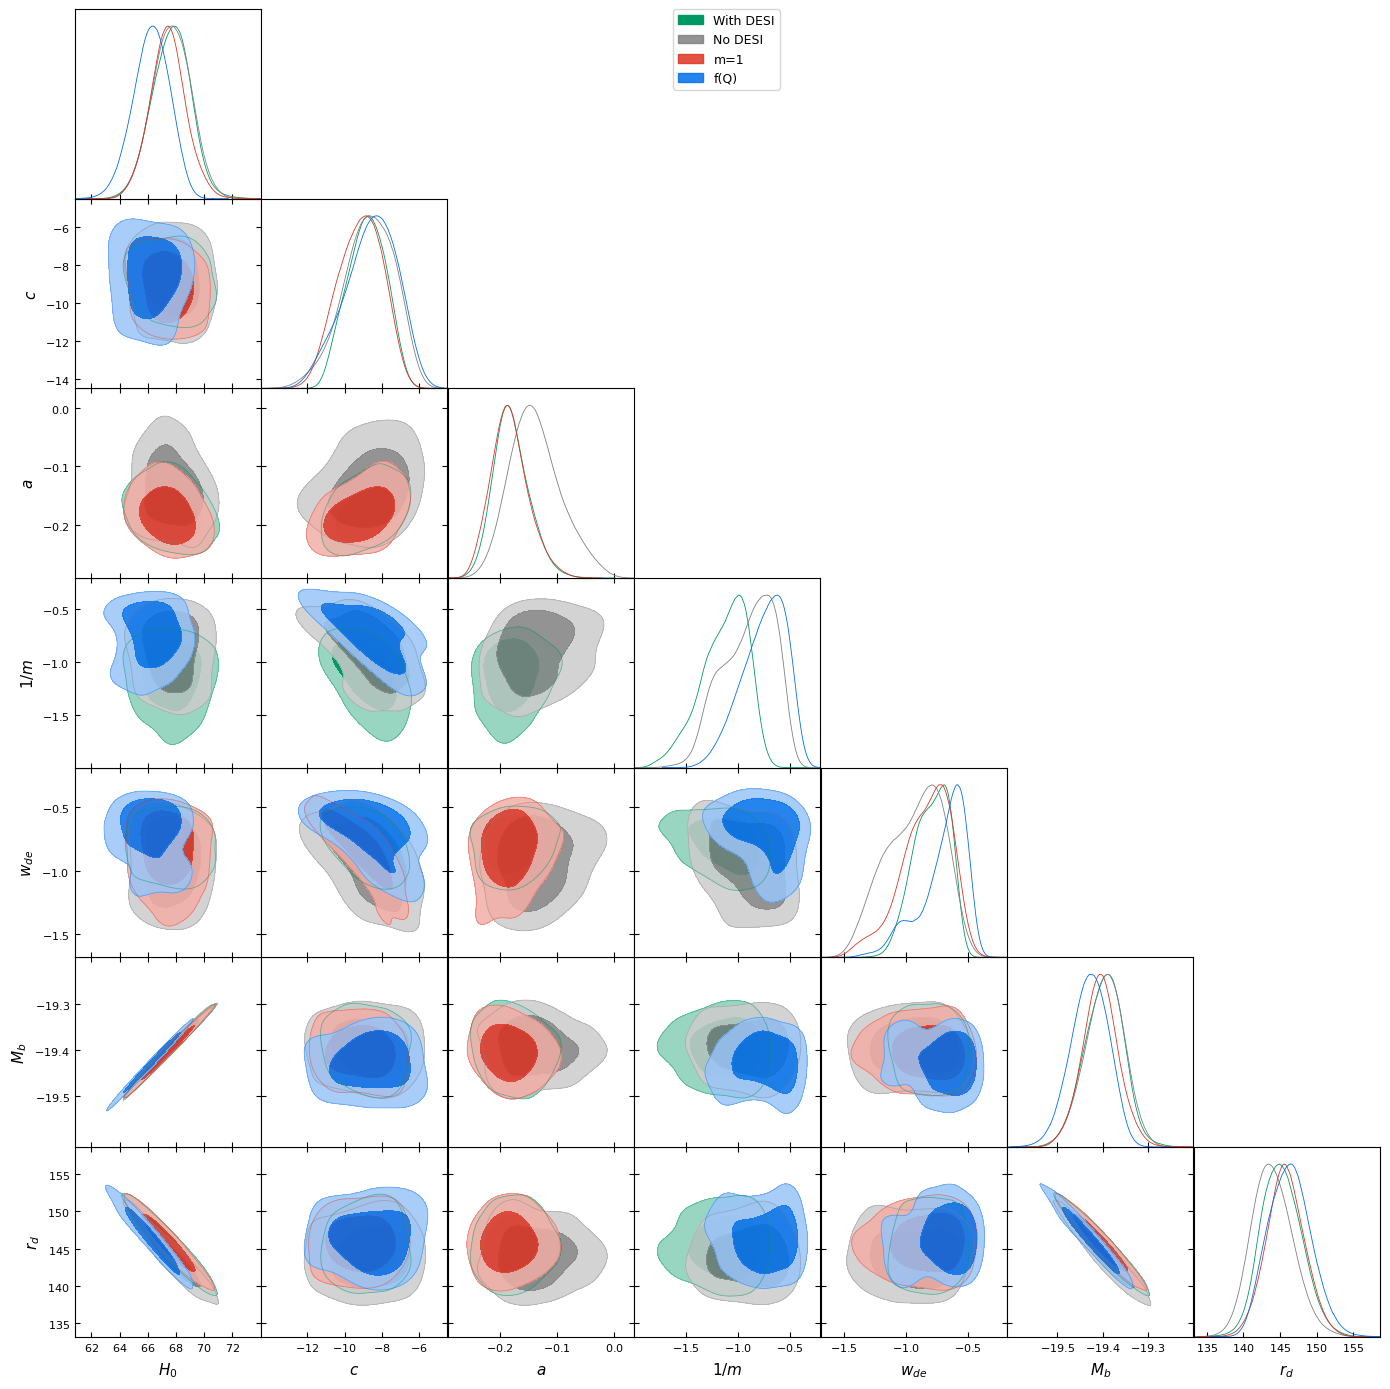

In [6]:
labels= ['H_0','c','a','1/m','w_{de}','M_b','r_d']
names = ['H_0','c','a','1/m','w_{de}','M_b','r_d']
%matplotlib inline
# 创建 MCSamples 对象
samples1 = MCSamples(samples=MC_chainWithDESI_fQT, names=names, labels=labels)
samples2 = MCSamples(samples=MC_chainNoDESI_fQT, names=names, labels=labels)
samples3 = MCSamples(samples=MC_chainWithDESI_fQT_meq1, names=['H_0','c','a','w_{de}','M_b','r_d'], labels=['H_0','c','a','w_{de}','M_b','r_d'])
samples4 = MCSamples(samples=MC_chainWithDESI_fQ, names=['H_0','c', '1/m','w_{de}','M_b','r_d'], labels=['H_0','c', '1/m','w_{de}','M_b','r_d'])

# 创建 GetDistPlotter 对象
g = plots.get_subplot_plotter()
# 添加多个链到图表
g.triangle_plot([samples1, samples2,samples3,samples4], filled_compare=True,
                legend_labels=['With DESI', 'No DESI','m=1','f(Q)'])
plt.show()

# Joint plot

In [7]:
# 常数
c_light=3e5

In [8]:
#FQT barrow
# 定义哈勃参数 H(z)
def H(z, theta):
    H0, c, a, m, wde, Mb, r_d = theta
    return (H0*(1+z)**(3*(1+a)/(2+3*a))-c**2*wde*(-1+(1+z)**((3*(1+a))/(2+3*a)))*(1+2*a)*m)

def InvEz(z, theta):
    H0, c, a, m, wde, Mb, r_d = theta
    return H0/H(z, theta)

def InteEz(z, theta):
    Inte = []
    for zi in z:
        if zi > 0:
            # 直接使用quad进行快速积分
            fArea, _ = integrate.quad(InvEz, 0, zi, args=(theta))
            Inte.append(fArea)
        else:
            Inte.append(0)
    return np.array(Inte)

def D_L(z,theta):
    H0, c, a, m, wde, Mb, r_d = theta
    d_z=(1+z)*c_light/H0*InteEz(z, theta)
    return d_z



# 定义距离尺度 D_M(z) 和 D_V(z)
def D_M(z, theta):
    H0, c, a, m, wde, Mb, r_d =theta
    return D_L(z,theta)/(1+z)/r_d

def D_V(z,theta):
    H0, c, a, m, wde, Mb, r_d =theta
    # 计算D_V(z) = (D_M^2 * z / H(z))^(1/3)
    D_m = D_M(z, theta)
    H_z = H(z, theta)
    return ((D_L(z,theta)/(1+z))**2 *c_light * z / H_z) ** (1/3) / r_d

def D_H(z, theta):
    H0, c, a, m, wde, Mb, r_d = theta
    # 计算D_H(z) = c / H(z)
    H_z = H(z, theta)
    return c_light / H_z / r_d



In [9]:
# FQ barrow a=0
# 定义哈勃参数 H(z)
def H2(z, theta):
    H0, c, m, wde, Mb, r_d = theta
    return (H0*(1+z)**(3/2)-c**2*wde*(-1+(1+z)**(3/2))*m)

def InvEz2(z, theta):
    H0, c, m, wde, Mb, r_d = theta
    return H0/H2(z, theta)

def InteEz2(z, theta):
    Inte = []
    for zi in z:
        if zi > 0:
            # 直接使用quad进行快速积分
            fArea, _ = integrate.quad(InvEz2, 0, zi, args=(theta))
            Inte.append(fArea)
        else:
            Inte.append(0)
    return np.array(Inte)

def D_L2(z,theta):
    H0, c, m, wde, Mb, r_d = theta
    d_z=(1+z)*c_light/H0*InteEz2(z, theta)
    return d_z

# 定义距离尺度 D_M(z) 和 D_V(z)
def D_M2(z, theta):
    H0, c, m, wde, Mb, r_d =theta
    return D_L2(z,theta)/(1+z)/r_d

def D_V2(z,theta):
    H0, c, m, wde, Mb, r_d =theta
    # 计算D_V(z) = (D_M^2 * z / H(z))^(1/3)
    D_m = D_M2(z, theta)
    H_z = H2(z, theta)
    return ((D_L2(z,theta)/(1+z))**2 *c_light * z / H_z) ** (1/3) / r_d

def D_H2(z, theta):
    H0, c, m, wde, Mb, r_d = theta
    # 计算D_H(z) = c / H(z)
    H_z = H2(z, theta)
    return c_light / H_z / r_d



In [10]:
# m=1
# 定义哈勃参数 H(z)
def H3(z, theta):
    H0, c, a, wde, Mb, r_d = theta
    return (H0*(1+z)**(3*(1+a)/(2+3*a))+c**2*wde*(-1+(1+z)**((3*(1+a))/(2+3*a)))*(1+2*a))

def InvEz3(z, theta):
    H0, c, a, wde, Mb, r_d = theta
    return H0/H3(z, theta)

def InteEz3(z, theta):
    Inte = []
    for zi in z:
        if zi > 0:
            # 直接使用quad进行快速积分
            fArea, _ = integrate.quad(InvEz3, 0, zi, args=(theta))
            Inte.append(fArea)
        else:
            Inte.append(0)
    return np.array(Inte)

def D_L3(z,theta):
    H0, c, a, wde, Mb, r_d = theta
    d_z=(1+z)*c_light/H0*InteEz3(z, theta)
    return d_z



# 定义距离尺度 D_M(z) 和 D_V(z)
def D_M3(z, theta):
    H0, c, a, wde, Mb, r_d =theta
    return D_L3(z,theta)/(1+z)/r_d

def D_V3(z,theta):
    H0, c, a, wde, Mb, r_d =theta
    # 计算D_V(z) = (D_M^2 * z / H(z))^(1/3)
    D_m = D_M3(z, theta)
    H_z = H3(z, theta)
    return ((D_L3(z,theta)/(1+z))**2 *c_light * z / H_z) ** (1/3) / r_d

def D_H3(z, theta):
    H0, c, a, wde, Mb, r_d = theta
    # 计算D_H(z) = c / H(z)
    H_z = H3(z, theta)
    return c_light / H_z / r_d



In [11]:
# LCDM
# 定义哈勃参数 H(z)
def H_LCDM(z, theta):
    H0, Omega_m, Mb, r_d = theta
    return H0 * np.sqrt(Omega_m * (1 + z)**3 + (1-Omega_m))

def InvEz_LCDM(z, theta):
    H0, Omega_m, Mb, r_d = theta
    return H0/H_LCDM(z, theta)

def InteEz_LCDM(z, theta):
    Inte = []
    for zi in z:
        if zi > 0:
            # 直接使用quad进行快速积分
            fArea, _ = integrate.quad(InvEz_LCDM, 0, zi, args=(theta))
            Inte.append(fArea)
        else:
            Inte.append(0)
    return np.array(Inte)

def D_L_LCDM(z,theta):
    H0, Omega_m, Mb, r_d = theta
    d_z=(1+z)*c_light/H0*InteEz_LCDM(z, theta)
    return d_z



# 定义距离尺度 D_M(z) 和 D_V(z)
def D_M_LCDM(z, theta):
    H0, Omega_m, Mb, r_d =theta
    return D_L_LCDM(z,theta)/(1+z)/r_d

def D_V_LCDM(z,theta):
    H0, Omega_m, Mb, r_d =theta
    # 计算D_V(z) = (D_M^2 * z / H(z))^(1/3)
    D_m = D_M_LCDM(z, theta)
    H_z = H_LCDM(z, theta)
    return ((D_L_LCDM(z,theta)/(1+z))**2 *c_light * z / H_z) ** (1/3) / r_d

def D_H_LCDM(z, theta):
    H0, Omega_m, Mb, r_d = theta
    # 计算D_H(z) = c / H(z)
    H_z = H_LCDM(z, theta)
    return c_light / H_z / r_d



In [12]:
# Delta=0
def Hd0(z, theta):
    H0, c, a, m, wde, Mb, r_d = theta
    return H0*(1+z)**((3*(1+a)*(m-c**2*(wde+2*wde*a)))/(m*(2+3*a)))

def InvEzd0(z, theta):
    H0, c, a, m, wde, Mb, r_d = theta
    return H0/Hd0(z, theta)

def InteEzd0(z, theta):
    Inte = []
    for zi in z:
        if zi > 0:
            # 直接使用quad进行快速积分
            fArea, _ = integrate.quad(InvEzd0, 0, zi, args=(theta))
            Inte.append(fArea)
        else:
            Inte.append(0)
    return np.array(Inte)

def D_Ld0(z,theta):
    H0, c, a, m, wde, Mb, r_d = theta
    d_z=(1+z)*c_light/H0*InteEzd0(z, theta)
    return d_z



# 定义距离尺度 D_M(z) 和 D_V(z)
def D_Md0(z, theta):
    H0, c, a, m, wde, Mb, r_d =theta
    return D_Ld0(z,theta)/(1+z)/r_d

def D_Vd0(z,theta):
    H0, c, a, m, wde, Mb, r_d =theta
    # 计算D_V(z) = (D_M^2 * z / H(z))^(1/3)
    D_m = D_Md0(z, theta)
    H_z = Hd0(z, theta)
    return ((D_Ld0(z,theta)/(1+z))**2 *c_light * z / H_z) ** (1/3) / r_d

def D_Hd0(z, theta):
    H0, c, a, m, wde, Mb, r_d = theta
    # 计算D_H(z) = c / H(z)
    H_z = Hd0(z, theta)
    return c_light / H_z / r_d



In [13]:
# Delta=0.5
def Hd05(z, theta):
    H0, c, a, m, wde, Mb, r_d = theta
    term1 = c**2 * wde + 2 * c**2 * wde * a
    term2 = (1 + z)**(3 * (1 + a) / (4 + 6 * a))
    sqrt_inner = H0 / m**2 + c**4 * (wde + 2 * wde * a)**2 + 2 * np.sqrt(c**4 * H0 / m**2 * (wde + 2 * wde * a)**2)
    H = term1 + term2 * np.sqrt(sqrt_inner)**2*m**2
    return H

def InvEzd05(z, theta):
    H0, c, a, m, wde, Mb, r_d = theta
    return H0/Hd05(z, theta)

def InteEzd05(z, theta):
    Inte = []
    for zi in z:
        if zi > 0:
            # 直接使用quad进行快速积分
            fArea, _ = integrate.quad(InvEzd05, 0, zi, args=(theta))
            Inte.append(fArea)
        else:
            Inte.append(0)
    return np.array(Inte)

def D_Ld05(z,theta):
    H0, c, a, m, wde, Mb, r_d = theta
    d_z=(1+z)*c_light/H0*InteEzd05(z, theta)
    return d_z



# 定义距离尺度 D_M(z) 和 D_V(z)
def D_Md05(z, theta):
    H0, c, a, m, wde, Mb, r_d =theta
    return D_Ld05(z,theta)/(1+z)/r_d

def D_Vd05(z,theta):
    H0, c, a, m, wde, Mb, r_d =theta
    # 计算D_V(z) = (D_M^2 * z / H(z))^(1/3)
    D_m = D_Md05(z, theta)
    H_z = Hd05(z, theta)
    return ((D_Ld05(z,theta)/(1+z))**2 *c_light * z / H_z) ** (1/3) / r_d

def D_Hd05(z, theta):
    H0, c, a, m, wde, Mb, r_d = theta
    # 计算D_H(z) = c / H(z)
    H_z = Hd05(z, theta)
    return c_light / H_z / r_d



In [14]:
# mean_fQT = get_parameter_means(MC_chainWithDESI_fQT)#1
# mean_NoDESI_fQT = get_parameter_means(MC_chainNoDESI_fQT)#
# mean_fQ = get_parameter_means(MC_chainWithDESI_fQ)
# mean_fQT_meq1 = get_parameter_means(MC_chainWithDESI_fQT_meq1)
# mean_LCDM = get_parameter_means(MC_chainWithDESI_LCDM)
# mean_fQT_Deq0 = get_parameter_means(MC_chainWithDESI_fQT_Deq0)
# mean_fQT_Deq05 = get_parameter_means(MC_chainWithDESI_fQT_Deq05)

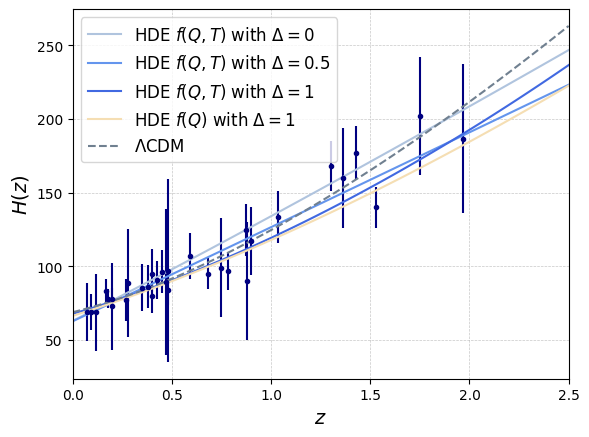

In [24]:
x0 = np.linspace(0, 2.5, 100)
plt.errorbar(xH, yH, yerrH, fmt=".", capsize=0, color='navy')
plt.plot(x0, Hd0(x0, mean_fQT_Deq0), label="HDE $f(Q,T)$ with $\Delta=0$", color='lightsteelblue')
plt.plot(x0, Hd05(x0, mean_fQT_Deq05), label="HDE $f(Q,T)$ with $\Delta=0.5$", color='cornflowerblue')
plt.plot(x0, H(x0, mean_fQT),  label="HDE $f(Q,T)$ with $\Delta=1$", color='royalblue')
plt.plot(x0, H2(x0, mean_fQ), label="HDE $f(Q)$ with $\Delta=1$",color='wheat')
plt.plot(x0, H_LCDM(x0,mean_LCDM),label=r'$\Lambda \text{CDM}$',linestyle='--', color='slategray')
# plt.plot(x0, H3(x0, mean_fQT_meq1), label="HDE $f(Q,T)$ with $\Delta=1$ and $m=1$", color='deepskyblue', linestyle='--')
# plt.plot(x0, H2(x0, model2_theta_fQ), label="HDE $f(Q)$")
# plt.plot(x0, H2(x0, model2_theta_fQT), label="HDE $f(Q,T)$")
plt.legend(fontsize=12)
plt.xlim(0, 2.5)
plt.xlabel("$z$", fontsize=14)
plt.ylabel("$H(z)$", fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig('./pic/H-z_relation.eps', format='eps')
plt.show()

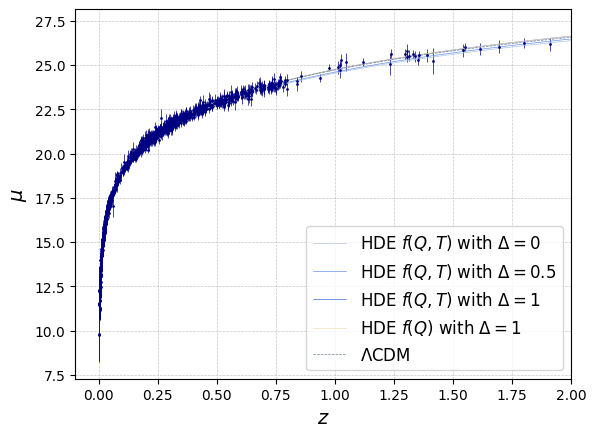

In [25]:
def modelS(z ,theta):
    H0, c, a, m, wde, Mb, r_d = theta
    modelS=5*np.log10(D_L(z,theta))+25+Mb
    return modelS
def modelS2(z ,theta):
    H0, c, m, wde, Mb, r_d = theta
    modelS=5*np.log10(D_L2(z,theta))+25+Mb
    return modelS
def modelS3(z ,theta):
    H0, c, a, wde, Mb, r_d = theta
    modelS=5*np.log10(D_L3(z,theta))+25+Mb
    return modelS
def modelSd0(z ,theta):
    H0, c, a, m, wde, Mb, r_d = theta
    modelS=5*np.log10(D_Ld0(z,theta))+25+Mb
    return modelS
def modelSd05(z ,theta):
    H0, c, a, m, wde, Mb, r_d = theta
    modelS=5*np.log10(D_Ld05(z,theta))+25+Mb
    return modelS
def modelS_LCDM(z ,theta):
    H0, Omega_m, Mb, r_d = theta
    modelS=5*np.log10(D_L_LCDM(z,theta))+25+Mb
    return modelS
    
x0 = np.linspace(0.01, 2, 100)

plt.errorbar(xS, yS, yerrS, fmt=".", capsize=0, ms=2, elinewidth=0.5, color='navy')
plt.plot(x0, modelSd0(x0, mean_fQT_Deq0), label="HDE $f(Q,T)$ with $\Delta=0$",lw=0.5,color='lightsteelblue')
plt.plot(x0, modelSd05(x0, mean_fQT_Deq05), label="HDE $f(Q,T)$ with $\Delta=0.5$", lw=0.5, color='cornflowerblue')
plt.plot(x0, modelS(x0, mean_fQT), label="HDE $f(Q,T)$ with $\Delta=1$", lw=0.5, color='royalblue')
plt.plot(x0, modelS2(x0, mean_fQ), label="HDE $f(Q)$ with $\Delta=1$", lw=0.5, color='wheat')
plt.plot(x0, modelS_LCDM(x0, mean_LCDM), label=r'$\Lambda \text{CDM}$', linestyle='--', lw=0.5, color='slategray')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlim(-0.1, 2.0)
plt.xlabel("$z$", fontsize=14)
plt.ylabel("$\mu$", fontsize=14)
plt.savefig('./pic/mu-z_relation.eps', format='eps')
plt.show()


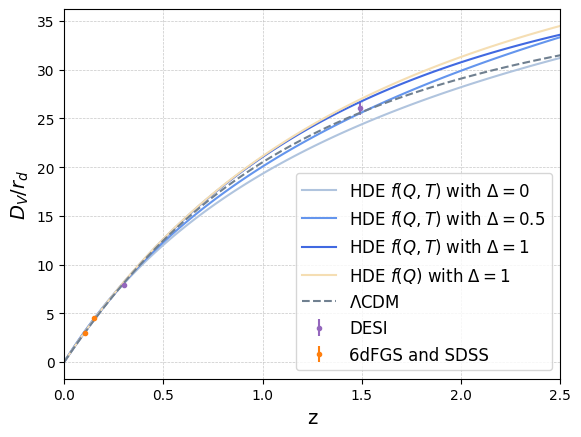

In [17]:
def model_DV(z, theta):
    H0, c, a, m, wde, Mb, r_d = theta
    model_DV = D_V(z, theta)
    return model_DV
def model_DV2(z, theta):
    H0, c, m, wde, Mb, r_d = theta
    model_DV = D_V2(z, theta)
    return model_DV
def model_DV3(z, theta):
    H0, c, a, wde, Mb, r_d = theta
    model_DV = D_V3(z, theta)
    return model_DV
def model_DVd0(z, theta):
    H0, c, a, m, wde, Mb, r_d = theta
    model_DV = D_Vd0(z, theta)
    return model_DV
def model_DVd05(z, theta):
    H0, c, a, m, wde, Mb, r_d = theta
    model_DV = D_Vd05(z, theta)
    return model_DV
def model_DV_LCDM(z, theta):
    H0, Omega_m, Mb, r_d = theta
    model_DV = D_V_LCDM(z, theta)
    return model_DV

x0 = np.linspace(0, 2.5, 100)
plt.errorbar(z_DV, D_V_obs, sigma_DV, fmt=".", capsize=0, label='DESI',c='C4')
plt.errorbar(z_DV_SDSS, D_V_obs_SDSS, sigma_DV_SDSS, fmt=".", capsize=0, label='6dFGS and SDSS',c='C1')
plt.plot(x0, model_DVd0(x0, mean_fQT_Deq0), label="HDE $f(Q,T)$ with $\Delta=0$",color='lightsteelblue')
plt.plot(x0, model_DVd05(x0, mean_fQT_Deq05), label="HDE $f(Q,T)$ with $\Delta=0.5$", color='cornflowerblue')
plt.plot(x0, model_DV(x0, mean_fQT),  label="HDE $f(Q,T)$ with $\Delta=1$", color='royalblue')
plt.plot(x0, model_DV2(x0, mean_fQ), label="HDE $f(Q)$ with $\Delta=1$", color='wheat')
plt.plot(x0, model_DV_LCDM(x0, mean_LCDM), label=r'$\Lambda \text{CDM}$',linestyle='--', color='slategray')
# plt.plot(x0, model_DV3(x0, mean_fQT_meq1), label="HDE $f(Q,T)$ with $\Delta=1$ and $m=1$", linestyle='--')
plt.legend(fontsize=12)
plt.xlim(0, 2.5)
plt.xlabel("z", fontsize=14)
plt.ylabel("$D_V/r_d$", fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig('./pic/DV-z_relation.eps', format='eps')
plt.show()

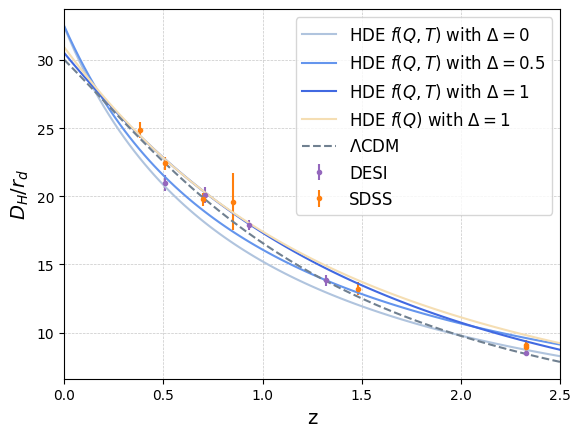

In [18]:
def model_DH(z, theta):
    H0, c, a, m, wde, Mb, r_d = theta
    model_DH = D_H(z, theta)
    return model_DH
def model_DH2(z, theta):
    H0, c, m, wde, Mb, r_d = theta
    model_DH = D_H2(z, theta)
    return model_DH
def model_DHd0(z, theta):
    H0, c, a, m, wde, Mb, r_d = theta
    model_DH = D_Hd0(z, theta)
    return model_DH
def model_DHd05(z, theta):
    H0, c, a, m, wde, Mb, r_d = theta
    model_DH = D_Hd05(z, theta)
    return model_DH
def model_DH_LCDM(z, theta):
    H0, Omega_m, Mb, r_d = theta
    model_DH = D_H_LCDM(z, theta)
    return model_DH

x0 = np.linspace(0, 2.5, 100)
plt.errorbar(z_DH, D_H_obs, sigma_DH, fmt=".", capsize=0, label='DESI',c='C4')
plt.errorbar(z_DH_SDSS, D_H_obs_SDSS, sigma_DH_SDSS, fmt=".", capsize=0, label='SDSS',c='C1')
plt.plot(x0, model_DHd0(x0, mean_fQT_Deq0), label="HDE $f(Q,T)$ with $\Delta=0$",color='lightsteelblue')
plt.plot(x0, model_DHd05(x0, mean_fQT_Deq05), label="HDE $f(Q,T)$ with $\Delta=0.5$", color='cornflowerblue')
plt.plot(x0, model_DH(x0, mean_fQT), label="HDE $f(Q,T)$ with $\Delta=1$", color='royalblue')
plt.plot(x0, model_DH2(x0, mean_fQ), label="HDE $f(Q)$ with $\Delta=1$", color='wheat')
plt.plot(x0, model_DH_LCDM(x0, mean_LCDM), label=r'$\Lambda \text{CDM}$',linestyle='--', color='slategray')

plt.legend(fontsize=12)
plt.xlim(0, 2.5)
plt.xlabel("z",fontsize=14)
plt.ylabel("$D_H/r_d$",fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig('./pic/DH-z_relation.eps', format='eps')
plt.show()

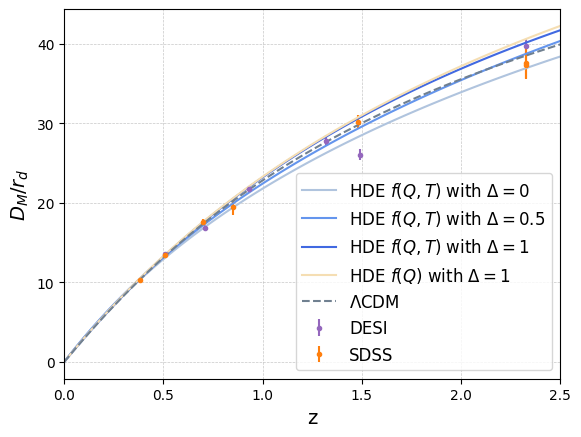

In [19]:
def model_DM(z, theta):
    H0, c, a, m, wde, Mb, r_d = theta
    model_DM = D_M(z, theta)
    return model_DM
def model_DM2(z, theta):
    H0, c, m, wde, Mb, r_d = theta
    model_DM = D_M2(z, theta)
    return model_DM
def model_DMd0(z, theta):
    H0, c, a, m, wde, Mb, r_d = theta
    model_DM = D_Md0(z, theta)
    return model_DM
def model_DMd05(z, theta):
    H0, c, a, m, wde, Mb, r_d = theta
    model_DM = D_Md05(z, theta)
    return model_DM
def model_DM_LCDM(z, theta):
    H0, Omega_m, Mb, r_d = theta
    model_DM = D_M_LCDM(z, theta)
    return model_DM

x0 = np.linspace(0, 2.5, 100)
plt.errorbar(z_DM, D_M_obs, sigma_DM, fmt=".", capsize=0,label='DESI',c='C4')
plt.errorbar(z_DM_SDSS, D_M_obs_SDSS, sigma_DM_SDSS, fmt=".", capsize=0,label='SDSS',c='C1')
plt.plot(x0, model_DMd0(x0, mean_fQT_Deq0), label="HDE $f(Q,T)$ with $\Delta=0$",color='lightsteelblue')
plt.plot(x0, model_DMd05(x0, mean_fQT_Deq05), label="HDE $f(Q,T)$ with $\Delta=0.5$", color='cornflowerblue')
plt.plot(x0, model_DM(x0, mean_fQT), label="HDE $f(Q,T)$ with $\Delta=1$", color='royalblue')
plt.plot(x0, model_DM2(x0, mean_fQ), label="HDE $f(Q)$ with $\Delta=1$", color='wheat')
plt.plot(x0, model_DM_LCDM(x0, mean_LCDM), label=r'$\Lambda \text{CDM}$',linestyle='--', color='slategray')
plt.legend(fontsize=12)
plt.xlim(0, 2.5)
plt.xlabel("z",fontsize=14)
plt.ylabel("$D_M/r_d$",fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig('./pic/DM-z_relation.eps', format='eps')
plt.show()

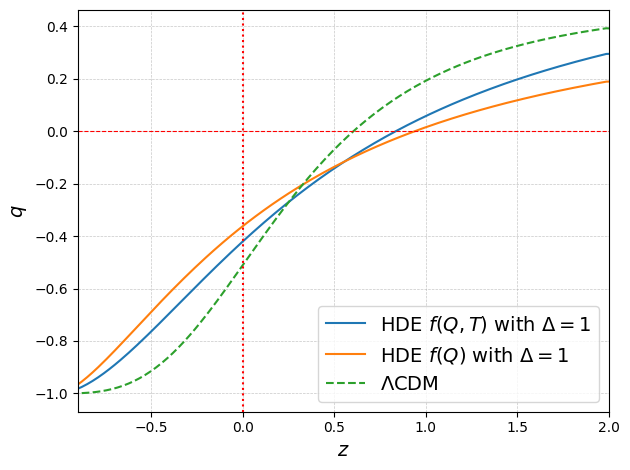

In [20]:
def q(z,theta):
    H0, c, a, m, wde, Mb, r_d = theta
    return (1+z)/H(z,theta)*np.gradient(H(z,theta),z)-1
def q2(z,theta):
    H0, c, m, wde, Mb, r_d = theta
    return (1+z)/H2(z,theta)*np.gradient(H2(z,theta),z)-1
def qd0(z,theta):
    H0, c, a, m, wde, Mb, r_d = theta
    return (1+z)/Hd0(z,theta)*np.gradient(Hd0(z,theta),z)-1
def qd05(z,theta):
    H0, c, a, m, wde, Mb, r_d = theta
    return (1+z)/Hd05(z,theta)*np.gradient(Hd05(z,theta),z)-1
def q_LCDM(z,theta):
    H0, Omega_m, Mb, r_d = theta
    return (1+z)/H_LCDM(z,theta)*np.gradient(H_LCDM(z,theta),z)-1
x0 = np.linspace(-1, 2, 200)
plt.plot(x0,q(x0,mean_fQT), label=r'HDE $f(Q,T)$ with $\Delta=1$')
plt.plot(x0,q2(x0,mean_fQ),  label=r'HDE $f(Q)$ with $\Delta=1$')
# plt.plot(x0, qd0(x0, mean_fQT_Deq0), label="HDE $f(Q,T)$ with $\Delta=0$")
# plt.plot(x0, qd05(x0, mean_fQT_Deq05), label="HDE $f(Q,T)$ with $\Delta=0.5$")
plt.plot(x0,q_LCDM(x0,mean_LCDM), label=r'$\Lambda \text{CDM}$',linestyle='--')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8)
plt.axvline(0, color='red', linestyle=':', linewidth=1.5)  # 添加 z = 0 垂直线
plt.xlabel(r'$z$', fontsize=14)
plt.ylabel(r'$q$', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlim(-0.9, 2)
plt.tight_layout()
plt.savefig('./pic/q-z_relation.eps', format='eps')
plt.show()

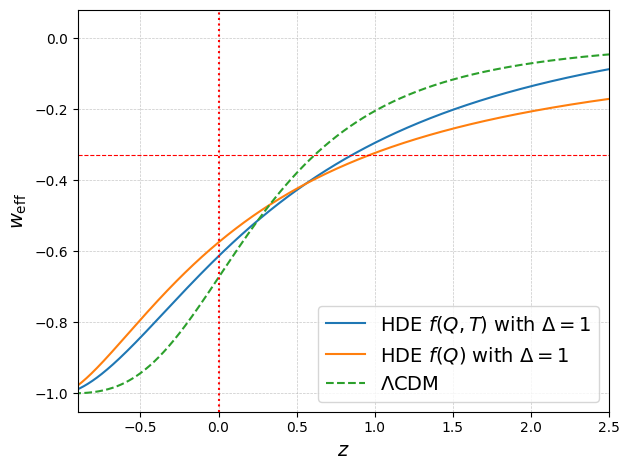

In [21]:
def w_eff(z,theta):
    return -1+2*np.gradient(H(z,theta),z)*(H(z,theta))*(1+z)/(3*H(z,theta)**2)
def w_effd0(z,theta):
    return -1+2*np.gradient(Hd0(z,theta),z)*(Hd0(z,theta))*(1+z)/(3*Hd0(z,theta)**2)
def w_effd05(z,theta):
    return -1+2*np.gradient(Hd05(z,theta),z)*(Hd05(z,theta))*(1+z)/(3*Hd05(z,theta)**2)
def w_eff_LCDM(z, theta):
    return -1+2*np.gradient(H_LCDM(z,theta),z)*(H_LCDM(z,theta))*(1+z)/(3*H_LCDM(z,theta)**2)
def w_eff_fQ(z, theta):
    return -1+2*np.gradient(H2(z,theta),z)*(H2(z,theta))*(1+z)/(3*H2(z,theta)**2)
x0 = np.linspace(-1, 5, 1000)
plt.plot(x0,w_eff(x0,mean_fQT), label="HDE $f(Q,T)$ with $\Delta=1$")
plt.plot(x0,w_eff_fQ(x0,mean_fQ),label="HDE $f(Q)$ with $\Delta=1$")
# plt.plot(x0, w_effd0(x0, mean_fQT_Deq0), label="HDE $f(Q,T)$ with $\Delta=0$")
# plt.plot(x0, w_effd05(x0, mean_fQT_Deq05), label="HDE $f(Q,T)$ with $\Delta=0.5$")
plt.plot(x0,w_eff_LCDM(x0,mean_LCDM), label=r'$\Lambda \text{CDM}$',linestyle='--')
plt.xlabel(r'$z$', fontsize=14)
plt.ylabel(r'$w_\text{eff}$', fontsize=14)
plt.axhline(-0.33, color='red', linestyle='--', linewidth=0.8)
plt.axvline(0, color='red', linestyle=':', linewidth=1.5)  # 添加 z = 0 垂直线
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlim(-0.9, 2.5)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('./pic/w_eff-z_relation.eps', format='eps')
plt.show()

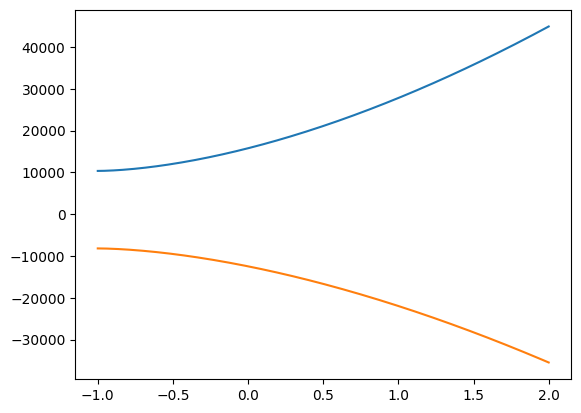

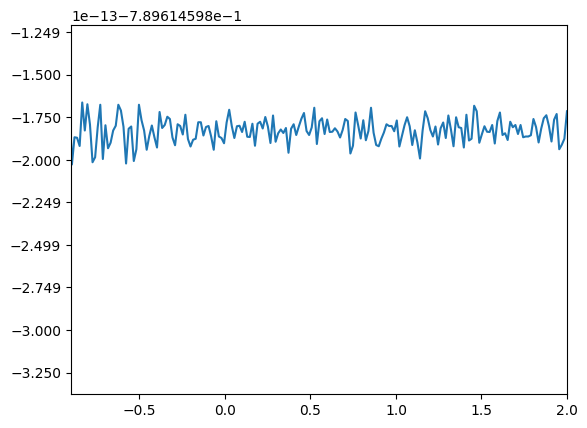

In [22]:
def rde(z,theta):
    H0, c, a, m, wde, Mb, r_d = theta
    return 3*c**2*H(z,theta)
def pde(z,theta):
    H0, c, a, m, wde, Mb, r_d = theta
    return 3*c**2*H(z,theta)*wde
def cs2(z,theta):
    H0, c, a, m, wde, Mb, r_d = theta
    return np.gradient(pde(z,theta),z)/np.gradient(rde(z,theta),z)
x0 = np.linspace(-1, 2, 200)
plt.plot(x0,rde(x0,mean_fQT))
plt.plot(x0,pde(x0,mean_fQT))
plt.show()
plt.plot(x0,cs2(x0,mean_fQT))
plt.xlim(-0.9,2)
plt.show()

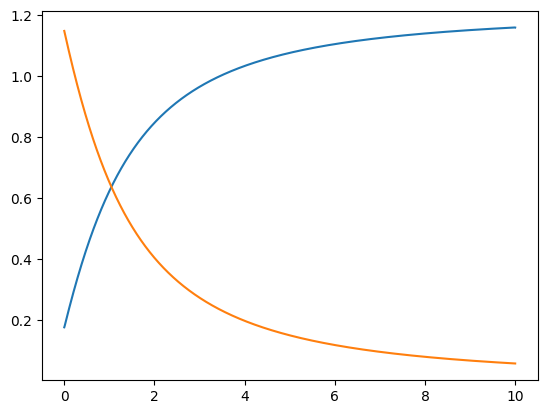

In [23]:
def rho_m(z, theta):
    H0, c, a, m, wde, Mb, r_d = theta    
    H_z = H(z,theta)
    dH_z = np.gradient(H_z,z)
    n=1
    # 物质密度的公式
    numerator = (1/m) * (2 * n - 1) * (6 * H_z**2)**(n - 1) * (
        -3 * (1 + wde) * (1 + a) * H_z**2 - 
        n * (1 + z) * (-2 + (-3 + wde) * a) * H_z * dH_z
    )
    denominator = wde * (1 + 3 * a + 2 * a**2)
    
    return numerator / denominator

def Omega_m(z,theta):
    return rho_m(z, theta)/(3*H(z,theta)**2)
def Omega_de(z,theta):
    return rde(z, theta)/(3*H(z,theta)**2)
x0 = np.linspace(0, 10, 2000)
plt.plot(x0,Omega_m(x0, mean_fQT))
plt.plot(x0,Omega_de(x0, mean_fQT))
plt.show()